In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import functions.eddy_feedback as ef

In [8]:
ao = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/annular_modes/MSLP_NAM/data/pamip_misc/ao_variance_info.csv')
ao.rename(columns={'variance': 'ao_variance'}, inplace=True)
aao = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/annular_modes/MSLP_SAM/data/pamip_misc/aao_variance_info.csv')
aao.rename(columns={'variance': 'aao_variance'}, inplace=True)
df = pd.merge(ao, aao)
df

,model,ao_variance,aao_variance
0,AWI-CM-1-1-MR,1.41,3.95
1,CNRM-CM6-1,1.95,5.59
2,CanESM5,1.52,3.52
3,FGOALS-f3-L,2.17,1.71
4,HadGEM3-GC31-LL,1.18,3.04
5,HadGEM3-GC31-MM,1.23,2.80
6,IPSL-CM6A-LR,1.81,3.70
7,JRA55,14.65,29.75
8,MIROC6,0.72,2.34


In [10]:
jra = df.loc[df['model'] == 'JRA55'].copy().reset_index(drop=True)
pamip = df.loc[df['model'] != 'JRA55'].copy().reset_index(drop=True)
pamip

,model,ao_variance,aao_variance
0,AWI-CM-1-1-MR,1.41,3.95
1,CNRM-CM6-1,1.95,5.59
2,CanESM5,1.52,3.52
3,FGOALS-f3-L,2.17,1.71
4,HadGEM3-GC31-LL,1.18,3.04
5,HadGEM3-GC31-MM,1.23,2.80
6,IPSL-CM6A-LR,1.81,3.70
7,MIROC6,0.72,2.34


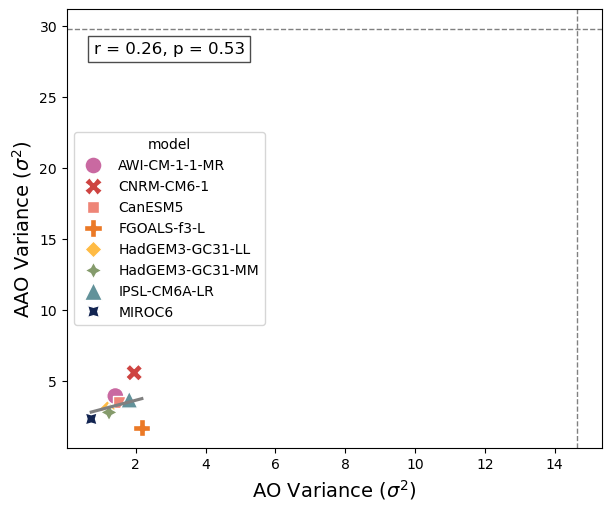

In [16]:
from pypalettes import load_cmap

# Load colormap and set up palette
cmap = load_cmap("Cross")
models = df['model'].unique()
colors = [cmap(i / (len(models) - 1)) for i in range(len(models))]
palette = dict(zip(models, colors))

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(6,5), constrained_layout=True)

# Plot 1: AO Variance vs AAO Variance
sns.regplot(ax=axes, data=pamip, x='ao_variance', y='aao_variance', scatter_kws={'color': 'white'}, 
            line_kws={"color": "gray"}, ci=None)
sns.scatterplot(ax=axes, data=pamip, x='ao_variance', y='aao_variance', hue='model', style='model', 
                s=150, palette=palette)

r, p = sp.stats.pearsonr(y=pamip['aao_variance'], x=pamip['ao_variance'])
axes.text(.05, .9, f"r = {r:.2f}, p = {p:.2f}", transform=axes.transAxes, 
             bbox=dict(facecolor="white", alpha=0.7), fontsize=12)

axes.set_ylabel('AAO Variance ($\\sigma^2$)', fontsize=14)
axes.set_xlabel('AO Variance ($\\sigma^2$)', fontsize=14)
axes.axvline(jra['ao_variance'].values[0], color='gray', linestyle='--', linewidth=1)
axes.axhline(jra['aao_variance'].values[0], color='gray', linestyle='--', linewidth=1)